### Calculate Customer Retention for a Retail Data Set. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data.
# online_retail = pd.read_excel('Online Retail.xlsx')
# (online_retail.rename(columns=str.lower)
#               .dropna(subset=['customerid']).astype({'customerid': int})
#               .to_csv('online_retail_processed.csv', index=False)
#       )
df = pd.read_csv('online_retail_processed.csv')
df = df.astype({'invoicedate': 'datetime64[ns]'})


# Create the cohorts and months since first invoice.
df['first_invoice_date'] = df.groupby('customerid')['invoicedate'].transform('min')
df['cohort'] = df.first_invoice_date.dt.to_period('M')
df['month_diff'] = (df.invoicedate.dt.to_period('M') - df.cohort).apply(lambda x: x.n)

# Filter to 2011 data.
df = df[df.cohort.dt.year == 2011]

In [5]:
# Compute the retention
retention = (df.groupby(['cohort', 'month_diff'])['customerid'].nunique().rename('customer_count').reset_index()
               .sort_values(['cohort', 'month_diff'])
)


def divide_by_first(df):
    return 100 * df.div(df.iloc[0]).round(2)

retention['retention_pct'] = retention.groupby('cohort')['customer_count'].transform(divide_by_first)

# Pivot the table into month columns.
retention_pivot = retention.pivot_table(columns = 'month_diff', 
                                index = 'cohort', values = 'retention_pct')

# Plot the retention table
(retention_pivot.style
    .background_gradient(cmap='Blues',vmin=0,vmax=100)
    .highlight_null('white')
    .format(precision=2)
)

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2011-01,100.00,24.00,28.00,24.00,33.00,30.00,26.00,26.00,31.00,35.00,37.00,15.00
2011-02,100.00,25.00,19.00,28.00,27.00,25.00,26.00,28.00,26.00,31.00,9.00,nan
2011-03,100.00,19.00,25.00,22.00,23.00,18.00,26.00,24.00,29.00,9.00,nan,nan
2011-04,100.00,23.00,22.00,21.00,21.00,24.00,23.00,26.00,8.00,nan,nan,nan
2011-05,100.00,24.00,17.00,17.00,22.00,24.00,27.00,10.00,nan,nan,nan,nan
2011-06,100.00,21.00,19.00,27.00,25.00,34.00,10.00,nan,nan,nan,nan,nan
2011-07,100.00,21.00,20.00,23.00,27.00,12.00,nan,nan,nan,nan,nan,nan
2011-08,100.00,25.00,25.00,25.00,14.00,nan,nan,nan,nan,nan,nan,nan
2011-09,100.00,30.00,33.00,12.00,nan,nan,nan,nan,nan,nan,nan,nan


In [7]:
retention.head()

,cohort,month_diff,customer_count,retention_pct
0,2011-01,0,421,100.0
1,2011-01,1,101,24.0
2,2011-01,2,119,28.0
3,2011-01,3,102,24.0
4,2011-01,4,138,33.0


<Axes: xlabel='month_diff', ylabel='retention_pct'>

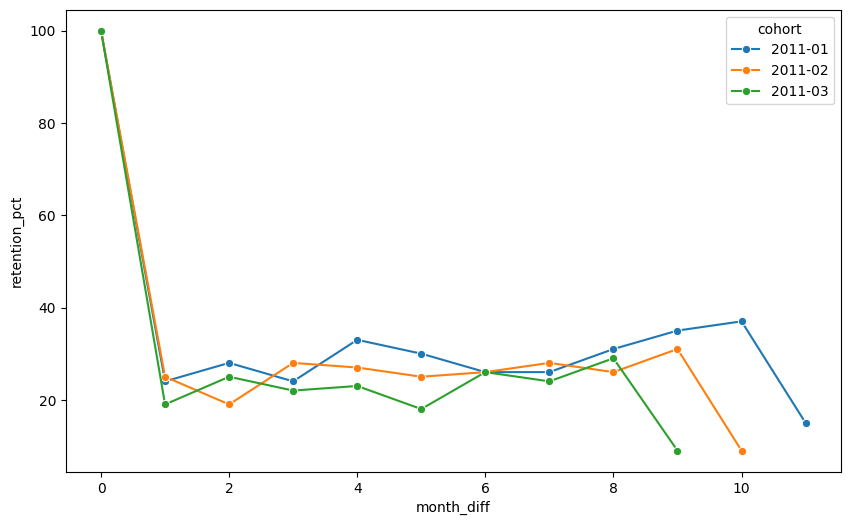

In [ ]:
# Compare the first three retention cohorts
plt.figure(figsize=(10, 6))
sns.lineplot(data=retention[retention.cohort <= '2011-03'], x='month_diff', y='retention_pct', hue='cohort', marker='o')

### Highlights
For all cohorts, there is a large drop in retention in the first month after acquisition. There is also a large drop   for all cohorts in December. 